In [4]:
%matplotlib inline
import random
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 8, 8

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# r-squared
print model.rsquared

# Print out the statistics
print model.summary()


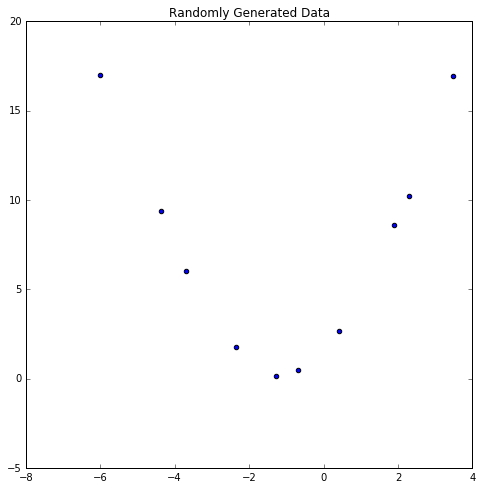

In [6]:
# Generate some data
def generate_data():
    xs = np.arange(-5, 5, 1)
    
    data = [(x - random.random(), (x + random.random())**2) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.show()

In [7]:
lm = linear_model.LinearRegression()

In [9]:
# This function from numpy builds a matrix of powers for us
X = np.vander(xs, 4)
y = ys
print X, y

[[ -2.15724016e+02   3.59693286e+01  -5.99744350e+00   1.00000000e+00]
 [ -8.39010730e+01   1.91651259e+01  -4.37779921e+00   1.00000000e+00]
 [ -5.00912696e+01   1.35885993e+01  -3.68627174e+00   1.00000000e+00]
 [ -1.29100715e+01   5.50324817e+00  -2.34590029e+00   1.00000000e+00]
 [ -2.06785223e+00   1.62310395e+00  -1.27401097e+00   1.00000000e+00]
 [ -3.32478662e-01   4.79927739e-01  -6.92768171e-01   1.00000000e+00]
 [  7.14814246e-02   1.72237931e-01   4.15015579e-01   1.00000000e+00]
 [  6.91855839e+00   3.63086755e+00   1.90548355e+00   1.00000000e+00]
 [  1.20432303e+01   5.25406363e+00   2.29217443e+00   1.00000000e+00]
 [  4.21358677e+01   1.21088053e+01   3.47977086e+00   1.00000000e+00]] [16.978039635556328, 9.4038827716452715, 6.0140329165900184, 1.7415459966566686, 0.15798291547518653, 0.47908379420734948, 2.6823588323277927, 8.5832261595229458, 10.245278604688524, 16.966372680940989]


In [13]:
model = lm.fit(X, y)
predictions = lm.predict(X)
predictions
for item in zip(model.coef_, ['constant', 'x', 'x^2', 'x^3']):
    print item

(0.01201894514601594, 'constant')
(0.78558248282958332, 'x')
(1.661251637314014, 'x^2')
(0.0, 'x^3')


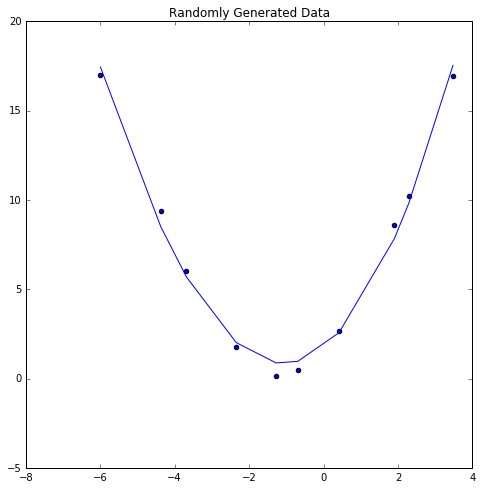

r^2: 0.991500128749


In [14]:
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", model.score(X, y)

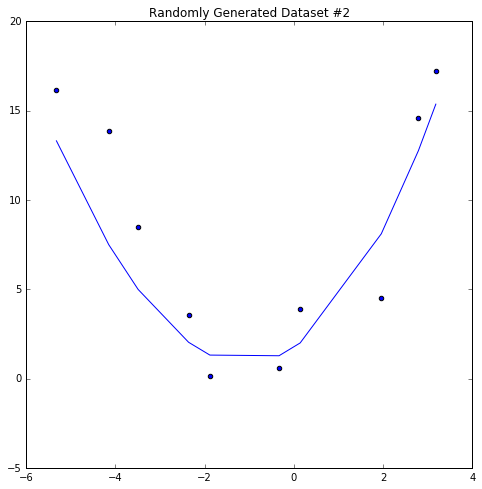

r^2: 0.77553299803


In [15]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", model.score(X, ys2)

In [16]:
# Note: alpha plays the role of lambda in sklearn (lambda is the notation on e.g. Wikipedia)
rlm = linear_model.Ridge(alpha=4, normalize=True)

In [17]:
# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

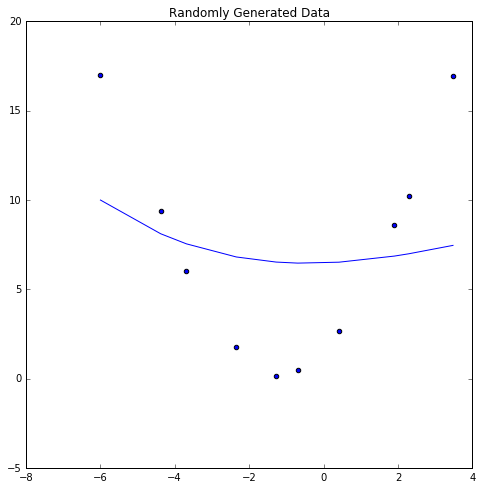

r^2: 0.225832474025


In [18]:
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)

In [19]:
for item in zip(ridge_model.coef_, ['constant', 'x', 'x^2', 'x^3']):
    print item

(-0.0051355939721967172, 'constant')
(0.078879791213200615, 'x')
(0.070393844607746059, 'x^2')
(0.0, 'x^3')


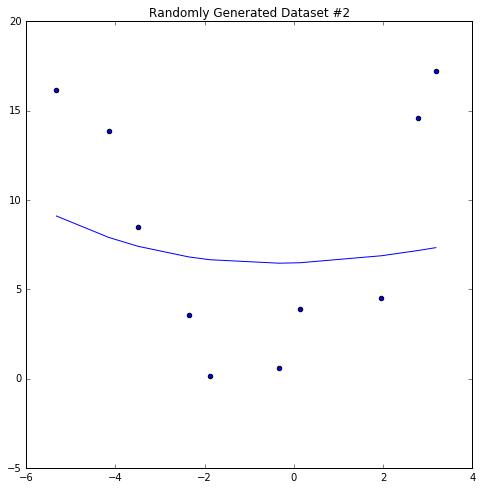

r^2: 0.14032098335


In [20]:
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

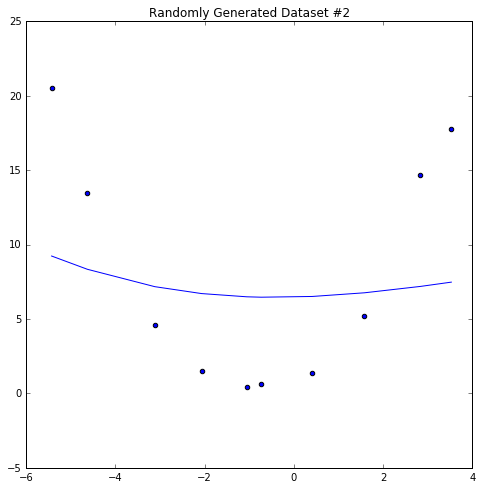

r^2: 0.174314323668


In [21]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

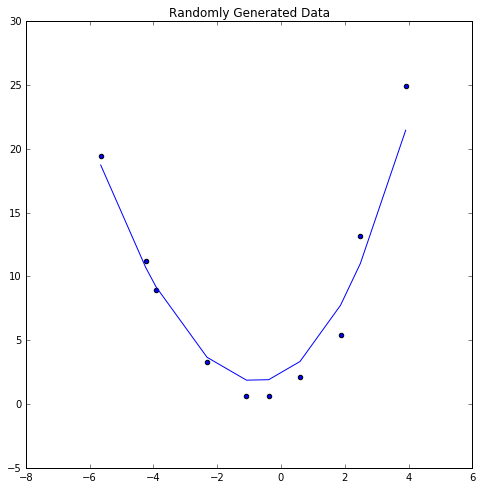

r^2: 0.955174098813
alpha: 0.1


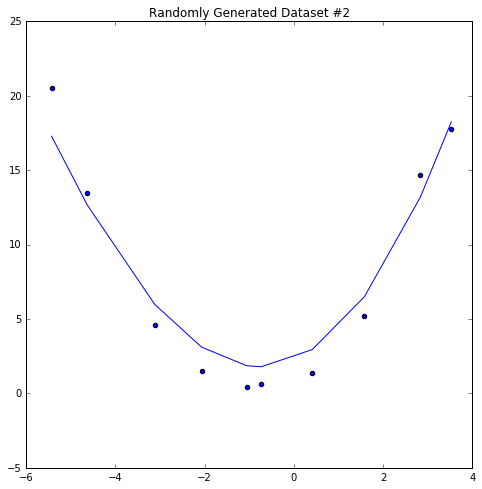

r^2: 0.952672082771


In [22]:
rlmcv = linear_model.RidgeCV(normalize=True)
xs, ys = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)
print "alpha:", rlmcv.alpha_

X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

In [42]:
import pandas as pd
boston = datasets.load_boston()
df= pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X = ['NOX', 'CRIM', 'AGE', 'LSTAT', 'DIS', 'TAX']

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
X

array([[ -1.80903711e+02,   3.19863721e+01,  -5.65564957e+00,
          1.00000000e+00],
       [ -7.64539885e+01,   1.80135827e+01,  -4.24424112e+00,
          1.00000000e+00],
       [ -6.02075375e+01,   1.53615101e+01,  -3.91937624e+00,
          1.00000000e+00],
       [ -1.25017543e+01,   5.38659066e+00,  -2.32090298e+00,
          1.00000000e+00],
       [ -1.27311084e+00,   1.17465630e+00,  -1.08381562e+00,
          1.00000000e+00],
       [ -5.84448862e-02,   1.50602094e-01,  -3.88074857e-01,
          1.00000000e+00],
       [  2.09816398e-01,   3.53096125e-01,   5.94218920e-01,
          1.00000000e+00],
       [  6.49305941e+00,   3.48043011e+00,   1.86559109e+00,
          1.00000000e+00],
       [  1.54040096e+01,   6.19092944e+00,   2.48815784e+00,
          1.00000000e+00],
       [  5.97491946e+01,   1.52834489e+01,   3.90940519e+00,
          1.00000000e+00]])

In [44]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [45]:
rlm = linear_model.Ridge(alpha=4, normalize=True)
ridge_model = rlm.fit(df, y)
predictions = ridge_model.predict(df)

In [51]:
# plt.scatter(xs, ys)
# plt.title("BOSTON DATASET")
# plt.plot(xs, predictions)
# plt.show()
print "r^2:", ridge_model.score(df, y)

 r^2: 0.451991242563


In [52]:
rlm = linear_model.Ridge(alpha=2, normalize=True)
ridge_model = rlm.fit(df, y)
predictions = ridge_model.predict(df)
print "r^2:", ridge_model.score(df, y)

r^2: 0.555480308592


In [53]:
rlm = linear_model.Ridge(alpha=1, normalize=True)
ridge_model = rlm.fit(df, y)
predictions = ridge_model.predict(df)
print "r^2:", ridge_model.score(df, y)

r^2: 0.635014072122


In [54]:
rlm = linear_model.Ridge(alpha=0, normalize=True)
ridge_model = rlm.fit(df, y)
predictions = ridge_model.predict(df)
print "r^2:", ridge_model.score(df, y)

r^2: 0.740607742865


In [55]:
rlm = linear_model.Ridge(alpha=6, normalize=True)
ridge_model = rlm.fit(df, y)
predictions = ridge_model.predict(df)
print "r^2:", ridge_model.score(df, y)

r^2: 0.384464652252


ValueError: x and y must be the same size

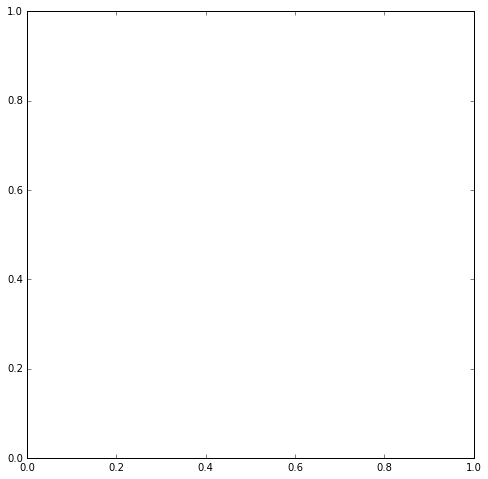

In [56]:
#figure out why this isnt working 
plt.scatter(df, y)
plt.title("Boston Data")
plt.plot(df, predictions)
plt.show()
print "r^2:", ridge_model.score(df, y)